# Performing a Simple Linear Regression

While we know that a more complex model is probably required, let’s start with testing using just a simple model, using a single input variable where our model will be in the form:


$$
  y = ax + b
$$


The analysis will need to be performed independently for each of the dependent variables, which we will select using the correlation tables (i.e., the independent variable with the highest correlation to the dependent variable):


| Dependant Variable | Independent (Predictor) Variable |
| ------------------ | -------------------------------- |
| Vol / ha           | chm_vf                           |
| BA / ha            | chm_vf                           |
| Mean DBH           | h90                              |


# 1. Imports

In [1]:
import os

import matplotlib.cm
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy
import pandas
import rsgislib.imagecalc
import rsgislib.imageutils
import rsgislib.regression
import rsgislib.tools.mapping
import rsgislib.tools.plotting
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection

In [2]:
%matplotlib inline

# 2. Read the input plot data 

In [3]:
# Open the CSV file as a Pandas data frame - the df variable.
df = pandas.read_csv("../data/lidar/Forest_Plot_Metrics.csv")

# 3. Fitting a Simple Linear Regression

Using the scikit-learn library the following scripts fit simple linear relationships for the three dependent variables

## 3.1 Vol / ha

In [4]:
# Get the chm_vf predictor variable and 'Vol / ha' dependent variable
# from the dataframe as numpy arrays
x = df[["chm_vf"]].values
y = df["Vol / ha"].values

# Randomly sample the input data to create training and testing (20% sample) datasets
# so we have an independent dataset to test the quality of the relationship
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=0
)

# Create a LinearRegression object
lm = sklearn.linear_model.LinearRegression()

# Fit the model using the training data
vol_mdl = lm.fit(x_train, y_train)

# Print the equation of the model
print("y = ax + b")
print("vol = ({} * chm_vf) + {}".format(vol_mdl.coef_[0], vol_mdl.intercept_))

y = ax + b
vol = (0.07187532585653598 * chm_vf) + -58.02758703510898


In [5]:
# Predict the values of stand volume using the model for the test data.
y_pred = vol_mdl.predict(x_test)
regress_vol_stats = rsgislib.regression.get_regression_stats(y_test, y_pred, n_vars=1)
regress_vol_stats

[{'r2': 0.9186646095070512,
  'explained_variance_score': 0.9255705296993322,
  'median_absolute_error': 26.336661174443428,
  'mean_absolute_error': 46.83664611350415,
  'mean_squared_error': 4604.57601282706,
  'root_mean_squared_error': 67.85702625982854,
  'norm_root_mean_squared_error': 23.295021131201235,
  'bias': -19.77269297997795,
  'norm_bias': -6.7878792540312025,
  'bias_squared': 390.9593876804693,
  'variance': 4213.61662514659,
  'noise': 9.094947017729282e-13}]

Text(0, 0.5, 'Stem Volume')

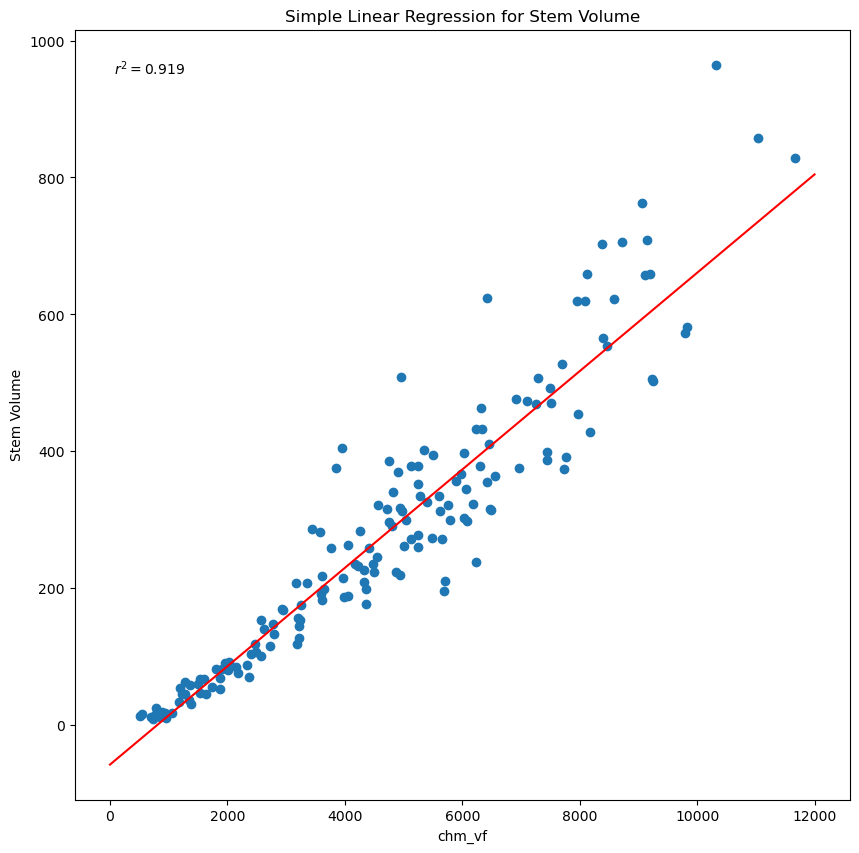

In [6]:
# Create 100 values at regular intervals between 0 and 12000
# to plot the relationship
x_plot = numpy.expand_dims(numpy.linspace(0, 12000, 100), axis=1)
# Calculate the values
y_plot = vol_mdl.predict(x_plot)

# Plot the relationship
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
plt.scatter(x, y)
plt.plot(x_plot, y_plot, color="red")
rSqStr = "$r^2 = " + str(round(regress_vol_stats[0]["r2"], 3)) + "$"
plt.text(0.05, 0.95, rSqStr, va="center", transform=ax1.transAxes)
plt.title("Simple Linear Regression for Stem Volume")
plt.xlabel("chm_vf")
plt.ylabel("Stem Volume")

## 3.2 BA / ha

In [7]:
# Get the chm_vf predictor variable and 'Vol / ha' dependent variable
# from the dataframe as numpy arrays
x = df[["chm_vf"]].values
y = df["BA / ha"].values

# Randomly sample the input data to create training and testing (20% sample) datasets
# so we have an independent dataset to test the quality of the relationship
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=0
)

# Create a LinearRegression object
lm = sklearn.linear_model.LinearRegression()

# Fit the model using the training data
ba_mdl = lm.fit(x_train, y_train)

# Print the equation of the model
print("y = ax + b")
print("ba = ({} * chm_vf) + {}".format(ba_mdl.coef_[0], ba_mdl.intercept_))

y = ax + b
ba = (0.00635414693011203 * chm_vf) + 6.2770888028234815


In [8]:
# Predict the values of stand volume using the model for the test data.
y_pred = ba_mdl.predict(x_test)
regress_ba_stats = rsgislib.regression.get_regression_stats(y_test, y_pred, n_vars=1)
regress_ba_stats

[{'r2': 0.8546330240635285,
  'explained_variance_score': 0.8546610454630652,
  'median_absolute_error': 5.39090984426878,
  'mean_absolute_error': 6.980170727431496,
  'mean_squared_error': 74.6695303873484,
  'root_mean_squared_error': 8.641153301923788,
  'norm_root_mean_squared_error': 24.32012021567061,
  'bias': -0.11997306200501633,
  'norm_bias': -0.3376585495774641,
  'bias_squared': 0.014393535606859492,
  'variance': 74.65513685174153,
  'noise': 1.4210854715202004e-14}]

Text(0, 0.5, 'Basal Area')

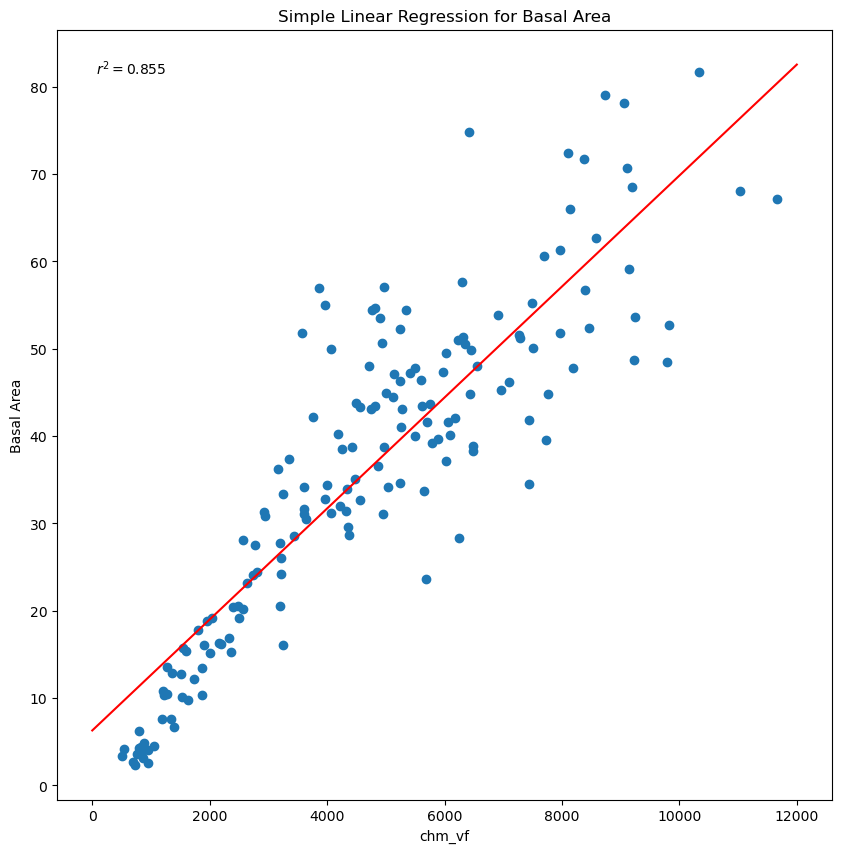

In [9]:
# Create 100 values at regular intervals between 0 and 12000
# to plot the relationship
x_plot = numpy.expand_dims(numpy.linspace(0, 12000, 100), axis=1)
# Calculate the values
y_plot = ba_mdl.predict(x_plot)

# Plot the relationship
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
plt.scatter(x, y)
plt.plot(x_plot, y_plot, color="red")
rSqStr = "$r^2 = " + str(round(regress_ba_stats[0]["r2"], 3)) + "$"
plt.text(0.05, 0.95, rSqStr, va="center", transform=ax1.transAxes)
plt.title("Simple Linear Regression for Basal Area")
plt.xlabel("chm_vf")
plt.ylabel("Basal Area")

## 3.3 Mean DBH

In [10]:
# Get the chm_vf predictor variable and 'Vol / ha' dependent variable
# from the dataframe as numpy arrays
x = df[["h90"]].values
y = df["Mean DBH"].values

# Randomly sample the input data to create training and testing (20% sample) datasets
# so we have an independent dataset to test the quality of the relationship
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=0
)

# Create a LinearRegression object
lm = sklearn.linear_model.LinearRegression()

# Fit the model using the training data
dbh_mdl = lm.fit(x_train, y_train)

# Print the equation of the model
print("y = ax + b")
print("ba = ({} * chm_vf) + {}".format(dbh_mdl.coef_[0], dbh_mdl.intercept_))

y = ax + b
ba = (1.1045861431975346 * chm_vf) + 3.998609786869636


In [11]:
# Predict the values of stand volume using the model for the test data.
y_pred = dbh_mdl.predict(x_test)
regress_dbh_stats = rsgislib.regression.get_regression_stats(y_test, y_pred, n_vars=1)
regress_dbh_stats

[{'r2': 0.8924495708781768,
  'explained_variance_score': 0.8934328642592797,
  'median_absolute_error': 1.0036912812980745,
  'mean_absolute_error': 1.586913447537509,
  'mean_squared_error': 5.637000821853071,
  'root_mean_squared_error': 2.374236892530539,
  'norm_root_mean_squared_error': 13.658892444338125,
  'bias': -0.22701760268100024,
  'norm_bias': -1.3060234333593923,
  'bias_squared': 0.051536991927028486,
  'variance': 5.585463829926042,
  'noise': 8.881784197001252e-16}]

Text(0, 0.5, 'DbH')

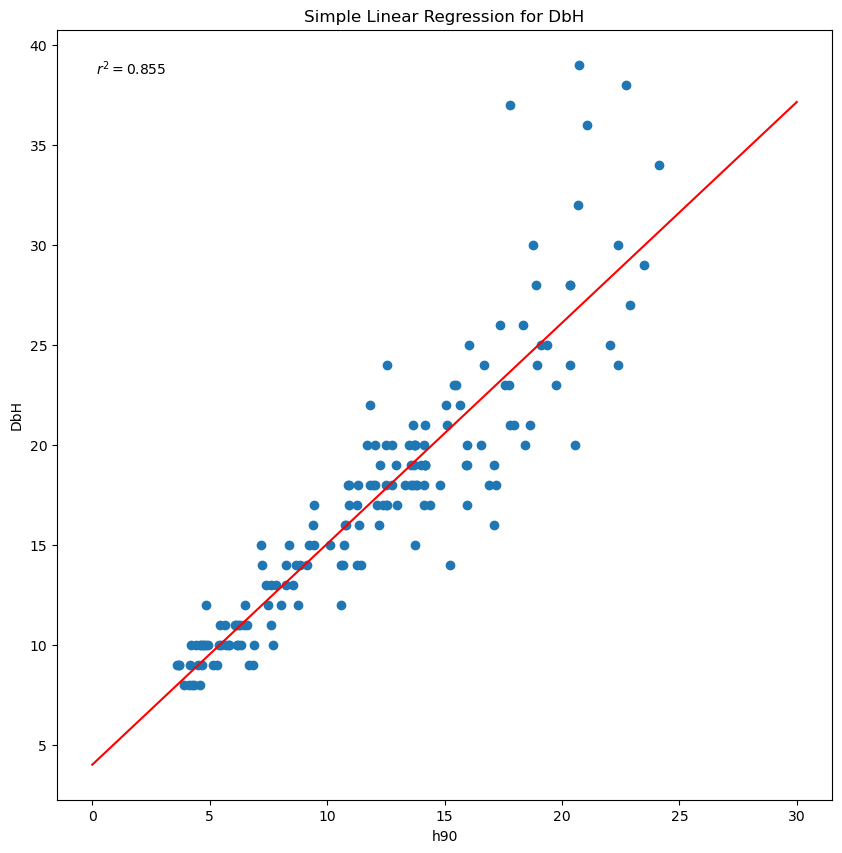

In [12]:
# Create 100 values at regular intervals between 0 and 12000
# to plot the relationship
x_plot = numpy.expand_dims(numpy.linspace(0, 30, 100), axis=1)
# Calculate the values
y_plot = dbh_mdl.predict(x_plot)

# Plot the relationship
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
plt.scatter(x, y)
plt.plot(x_plot, y_plot, color="red")
rSqStr = "$r^2 = " + str(round(regress_ba_stats[0]["r2"], 3)) + "$"
plt.text(0.05, 0.95, rSqStr, va="center", transform=ax1.transAxes)
plt.title("Simple Linear Regression for DbH")
plt.xlabel("h90")
plt.ylabel("DbH")

# 4. Summarising Results

Within the code above you will see that the data is split to create testing and training datasets, as you would with a classification problem. The testing data can then be used to estimate the accuracy of the model developed, and summarised in the table below:

| Dependant Variable | R2    | MAE  | MSE    | RMSE  | %RMSE  |
| ------------------ | ----- | ---- | ------ | ----- | ------ |
| Vol / ha           | 0.919 | 46.8 | 4604.5 | 67.9  | 23.3 % |
| BA / ha            | 0.855 | 7.0  | 74.7   | 8.6   | 24.3 % |
| Mean DBH           | 0.892 | 1.6  | 5.6    | 2.4   | 13.7 % |


We also have the equations to predict the dependant variables, which we can now use apply the relationship to the image data:

| Dependant Variable | a      | b      | 
| ------------------ | ------ | ------ | 
| Vol / ha           | 0.0719 | -58.03 |
| BA / ha            | 0.0064 | 6.28   |
| Mean DBH           | 1.1056 | 4.00   |

*Note. these coefficients and summary statistics might be a little different from what you have depending on the version of scikit-learn and random selection of the training and testing datasets*


# 5. Applying our Model to the Image Data

Now we have the equations for the relationships we can apply these to the image data to get a spatial prediction of the variables:


## 5.1 Create output directory

In [13]:
out_dir = "simple_linear_out_imgs"
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

## 5.2 Define the input image

In [14]:
input_img = "../data/lidar/Forest_ALS_Metrics.kea"
vld_msk_img = "../data/lidar/Forest_ALS_Valid.kea"

## 5.3 Define output GTIFF Options

In [15]:
rsgislib.imageutils.set_env_vars_lzw_gtiff_outs()

## 5.4 Apply Vol / ha 

In [16]:
vol_out_img = os.path.join(out_dir, "Forest_ALS_Volume.tif")

# Define the band information, the chm_vf variable is band 51 in the input image
band_info = [
    rsgislib.imagecalc.BandDefn("chm_vf", input_img, 51),
    rsgislib.imagecalc.BandDefn("vld_msk", vld_msk_img, 1),
]

# Check that pixel is within the valid mask (i.e., is equal to 1)
vol_exp = "vld_msk==1?(chm_vf * 0.0719) + -58.03:0"

# Apply the model to the image and then calculate the image stats and pyramids for visualisation
rsgislib.imagecalc.band_math(
    vol_out_img, vol_exp, "GTIFF", rsgislib.TYPE_32FLOAT, band_info
)
rsgislib.imageutils.pop_img_stats(
    vol_out_img, use_no_data=True, no_data_val=0, calc_pyramids=True
)

Image: ../data/lidar/Forest_ALS_Metrics.kea
	 Variable 'chm_vf' is band 51
Image: ../data/lidar/Forest_ALS_Valid.kea
	 Variable 'vld_msk' is band 1
New image width = 3053 height = 2637 bands = 1



Calculating Image Pyramids.




## 5.5 Apply BA / ha

In [17]:
ba_out_img = os.path.join(out_dir, "Forest_ALS_BA.tif")

# Define the band information, the chm_vf variable is band 51 in the input image
band_info = [
    rsgislib.imagecalc.BandDefn("chm_vf", input_img, 51),
    rsgislib.imagecalc.BandDefn("vld_msk", vld_msk_img, 1),
]

# Check that pixel is within the valid mask (i.e., is equal to 1)
ba_exp = "vld_msk==1?(chm_vf * 0.0064) + 6.28:0"

# Apply the model to the image and then calculate the image stats and pyramids for visualisation
rsgislib.imagecalc.band_math(
    ba_out_img, ba_exp, "GTIFF", rsgislib.TYPE_32FLOAT, band_info
)
rsgislib.imageutils.pop_img_stats(
    ba_out_img, use_no_data=True, no_data_val=0, calc_pyramids=True
)

Image: ../data/lidar/Forest_ALS_Metrics.kea
	 Variable 'chm_vf' is band 51
Image: ../data/lidar/Forest_ALS_Valid.kea
	 Variable 'vld_msk' is band 1
New image width = 3053 height = 2637 bands = 1



Calculating Image Pyramids.




## 5.6 Apply DBH

In [18]:
dbh_out_img = os.path.join(out_dir, "Forest_ALS_DBH.tif")

# Define the band information, the h90 variable is band 19 in the input image
band_info = [
    rsgislib.imagecalc.BandDefn("h90", input_img, 19),
    rsgislib.imagecalc.BandDefn("vld_msk", vld_msk_img, 1),
]

# Check that pixel is within the valid mask (i.e., is equal to 1)
dbh_exp = "vld_msk==1?(h90 * 1.1056) + 4.0:0"

# Apply the model to the image and then calculate the image stats and pyramids for visualisation
rsgislib.imagecalc.band_math(
    dbh_out_img, dbh_exp, "GTIFF", rsgislib.TYPE_32FLOAT, band_info
)
rsgislib.imageutils.pop_img_stats(
    dbh_out_img, use_no_data=True, no_data_val=0, calc_pyramids=True
)

Image: ../data/lidar/Forest_ALS_Metrics.kea
	 Variable 'h90' is band 19
Image: ../data/lidar/Forest_ALS_Valid.kea
	 Variable 'vld_msk' is band 1
New image width = 3053 height = 2637 bands = 1



Calculating Image Pyramids.




# 6. Visualise Image Results

Image Data Size: 501 x 538
Image Data Size: 501 x 538
Image Data Size: 501 x 538


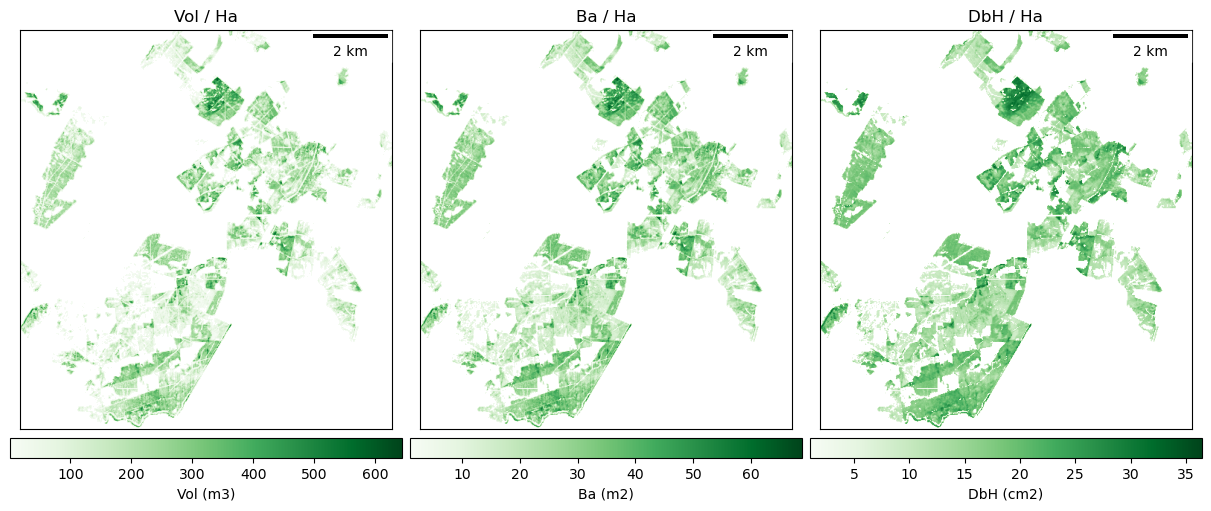

In [19]:
sub_bbox = [291171, 301190, 246680, 257452]

fig = plt.figure(figsize=(12, 5), constrained_layout=True)  #
gspec = gridspec.GridSpec(
    ncols=3,
    nrows=2,
    height_ratios=[1, 0.05],
    width_ratios=[1, 1, 1],
    figure=fig,
)

ax_00 = fig.add_subplot(gspec[0, 0])
vol_cmap, vol_norm = rsgislib.tools.mapping.create_raster_cmap_img_map(
    ax=ax_00,
    input_img=vol_out_img,
    img_band=1,
    bbox=sub_bbox,
    title_str="Vol / Ha",
    show_scale_bar=True,
    use_grid=False,
    show_map_axis=True,
    cmap_name="Greens",
    norm_img_vals=True,
    use_log_norm=False,
    norm_vmin=1,
    norm_vmax=None,
    vals_under_white=True,
)
ax_00.set_xticks([])
ax_00.set_yticks([])

ax_10 = fig.add_subplot(gspec[1, 0])
cbar = fig.colorbar(
    mappable=matplotlib.cm.ScalarMappable(norm=vol_norm, cmap=vol_cmap),
    cax=ax_10,
    orientation="horizontal",
    ticklocation="bottom",
    label="Vol (m3)",
)

ax_01 = fig.add_subplot(gspec[0, 1])
ba_cmap, ba_norm = rsgislib.tools.mapping.create_raster_cmap_img_map(
    ax=ax_01,
    input_img=ba_out_img,
    img_band=1,
    bbox=sub_bbox,
    title_str="Ba / Ha",
    show_scale_bar=True,
    use_grid=False,
    show_map_axis=True,
    cmap_name="Greens",
    norm_img_vals=True,
    use_log_norm=False,
    norm_vmin=1,
    norm_vmax=None,
    vals_under_white=True,
)
ax_01.set_xticks([])
ax_01.set_yticks([])

ax_11 = fig.add_subplot(gspec[1, 1])
cbar = fig.colorbar(
    mappable=matplotlib.cm.ScalarMappable(norm=ba_norm, cmap=ba_cmap),
    cax=ax_11,
    orientation="horizontal",
    ticklocation="bottom",
    label="Ba (m2)",
)


ax_02 = fig.add_subplot(gspec[0, 2])
dbh_cmap, dbh_norm = rsgislib.tools.mapping.create_raster_cmap_img_map(
    ax=ax_02,
    input_img=dbh_out_img,
    img_band=1,
    bbox=sub_bbox,
    title_str="DbH / Ha",
    show_scale_bar=True,
    use_grid=False,
    show_map_axis=True,
    cmap_name="Greens",
    norm_img_vals=True,
    use_log_norm=False,
    norm_vmin=1,
    norm_vmax=None,
    vals_under_white=True,
)
ax_02.set_xticks([])
ax_02.set_yticks([])

ax_12 = fig.add_subplot(gspec[1, 2])
cbar = fig.colorbar(
    mappable=matplotlib.cm.ScalarMappable(norm=dbh_norm, cmap=dbh_cmap),
    cax=ax_12,
    orientation="horizontal",
    ticklocation="bottom",
    label="DbH (cm2)",
)